# KDD Cup - Comparison of GMM, KNN and AE results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set()

In [20]:
SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()

knn_results = pd.read_csv("results/knn_kdd_cup_scored.csv", index_col=0)
knn_distances = pd.read_csv("results/knn_kdd_cup_distances.csv", index_col=0)
knn_distances = knn_distances / np.max(knn_distances.values)
#knn_distances = knn_distances / np.max(knn_distances.values, axis=0)

gm_results = pd.read_csv("results/gmm_kdd_cup_scored.csv", index_col=0)
gm_distances = pd.read_csv("results/gmm_kdd_cup_distances.csv", index_col=0)
gm_distances = gm_distances / np.max(gm_distances.values)
#gm_distances = gm_distances / np.max(gm_distances.values, axis=0)
gm_distances = gm_distances[knn_distances.columns]

ae_results = pd.read_csv("results/ae_kdd_cup_scored.csv", index_col=0)
ae_distances = pd.read_csv("results/ae_kdd_cup_distances.csv", index_col=0)
ae_distances = ae_distances / np.max(ae_distances.values)
#ae_distances = ae_distances / np.max(ae_distances.values, axis=0)
ae_distances = ae_distances[knn_distances.columns]

names = "duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate".split(",")
features = names
df = pd.read_csv("data/kdd99-unsupervised-ad.csv", names=np.append(names, "label"))
df.head(5)

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,215.0,45076.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
2,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
3,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
4,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


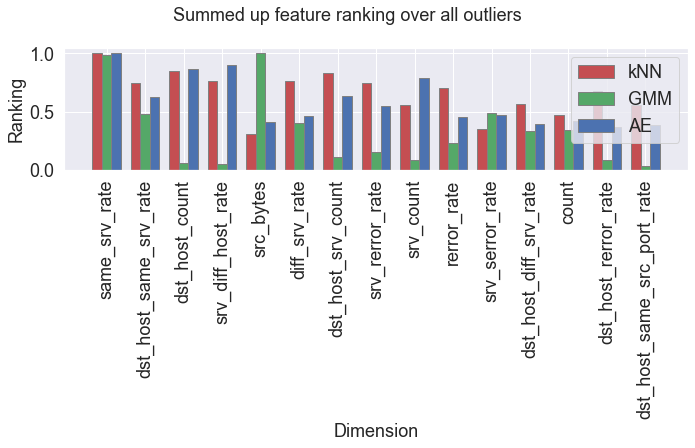

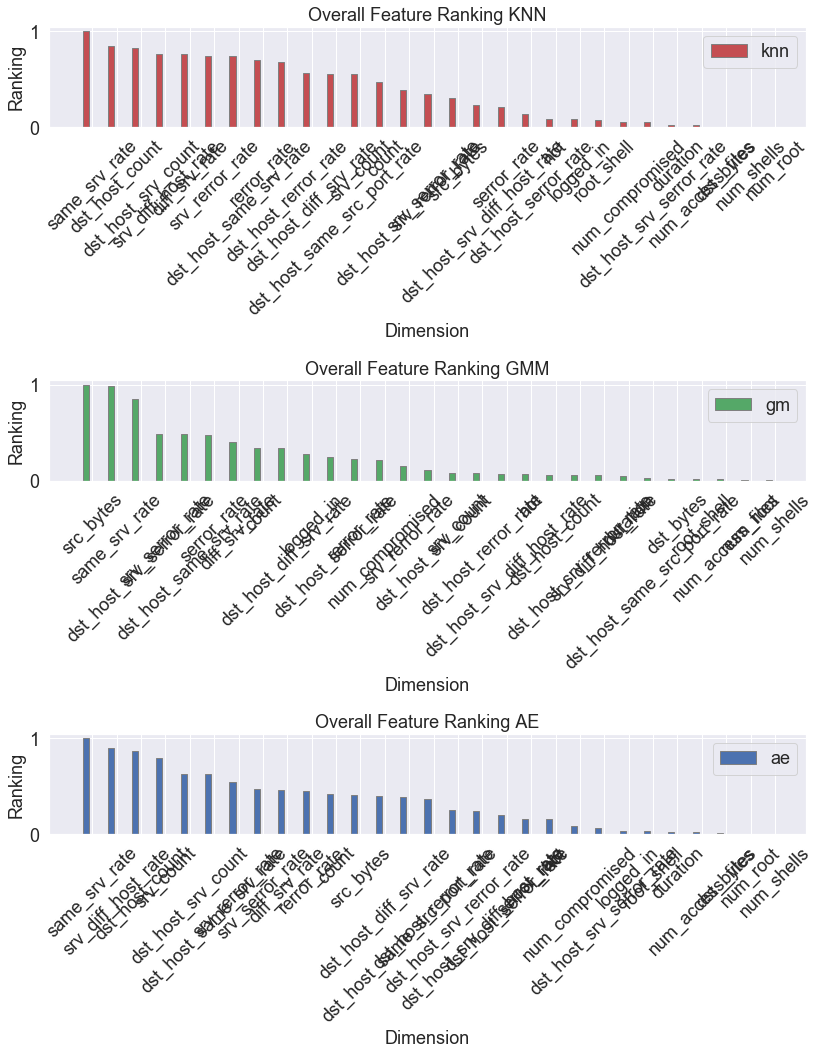

In [18]:
# plot the summed up feature ranking for all 50 outliers
MAX_COLUMNS = 15

barWidth = 0.25
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# set height of bar
knn = knn_distances.sum().values
knn = knn / knn.max()
gm = gm_distances.sum().values
gm = gm / gm.max()
ae = ae_distances.sum().values
ae = ae / ae.max()

sort_indx = np.argsort((ae + knn + gm) * -1)[:MAX_COLUMNS]

# Set position of bar on X axis
br1 = np.arange(len(knn))[:MAX_COLUMNS]
br2 = [x + barWidth for x in br1][:MAX_COLUMNS]
br3 = [x + barWidth for x in br2][:MAX_COLUMNS]

# Make the plot
ax.bar(br1, knn[sort_indx], color ='r', width = barWidth,
        edgecolor ='grey', label ='kNN')
ax.bar(br2, gm[sort_indx], color ='g', width = barWidth,
        edgecolor ='grey', label ='GMM')
ax.bar(br3, ae[sort_indx], color ='b', width = barWidth,
        edgecolor ='grey', label ='AE')

# Adding Xticks
ax.set_xlabel('Dimension')
ax.set_ylabel('Ranking')
#ax.set_ylim([0, 1.03])
ax.set_xticks([r + barWidth for r in range(len(knn))][:MAX_COLUMNS])
ax.set_xticklabels(knn_distances.columns[sort_indx][:MAX_COLUMNS], rotation=90)
ax.legend()
fig.suptitle("Summed up feature ranking over all outliers", y=1.05)
#ax.set_yticklabels([])

fig.tight_layout()
plt.savefig("images/kdd_cup_data_ranking.eps", bbox_inches="tight")
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(12,15))
br1 = np.arange(len(knn))
sort_indx_knn = np.argsort(knn * -1)
axes[0].bar(br1, knn[sort_indx_knn], color ='r', width = barWidth,
        edgecolor ='grey', label ='knn')
axes[0].set_xlabel('Dimension')
axes[0].set_ylabel('Ranking')
axes[0].set_xticks([r + barWidth for r in range(len(knn))])
axes[0].set_xticklabels(knn_distances.columns[sort_indx_knn], rotation=45)
axes[0].legend()
axes[0].set_title("Overall Feature Ranking KNN")

br1 = np.arange(len(gm))
sort_indx_gm = np.argsort(gm * -1)
axes[1].bar(br1, gm[sort_indx_gm], color ='g', width = barWidth,
        edgecolor ='grey', label ='gm')
axes[1].set_xlabel('Dimension')
axes[1].set_ylabel('Ranking')
axes[1].set_xticks([r + barWidth for r in range(len(gm))])
axes[1].set_xticklabels(gm_distances.columns[sort_indx_gm], rotation=45)
axes[1].legend()
axes[1].set_title("Overall Feature Ranking GMM")

br1 = np.arange(len(ae))
sort_indx_ae = np.argsort(ae * -1)
axes[2].bar(br1, ae[sort_indx_ae], color ='b', width = barWidth,
        edgecolor ='grey', label ='ae')
axes[2].set_xlabel('Dimension')
axes[2].set_ylabel('Ranking')
axes[2].set_xticks([r + barWidth for r in range(len(ae))])
axes[2].set_xticklabels(ae_distances.columns[sort_indx_ae], rotation=45)
axes[2].legend()
axes[2].set_title("Overall Feature Ranking AE")
fig.tight_layout()
plt.show()

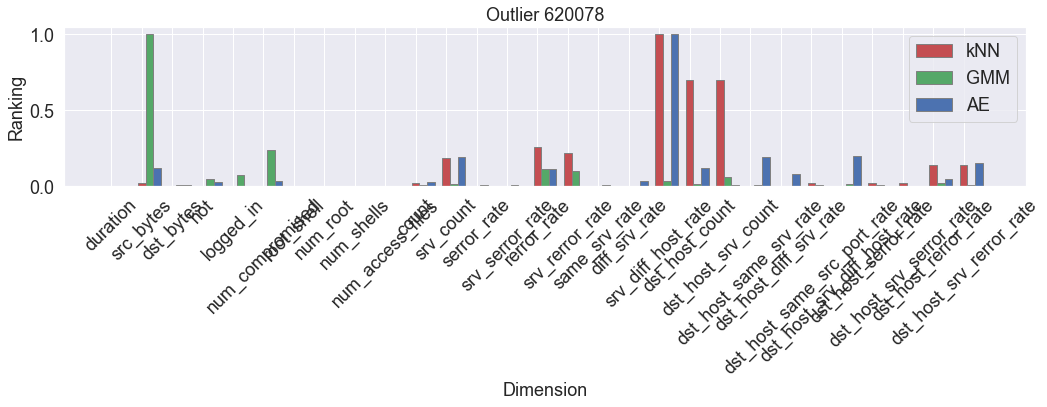

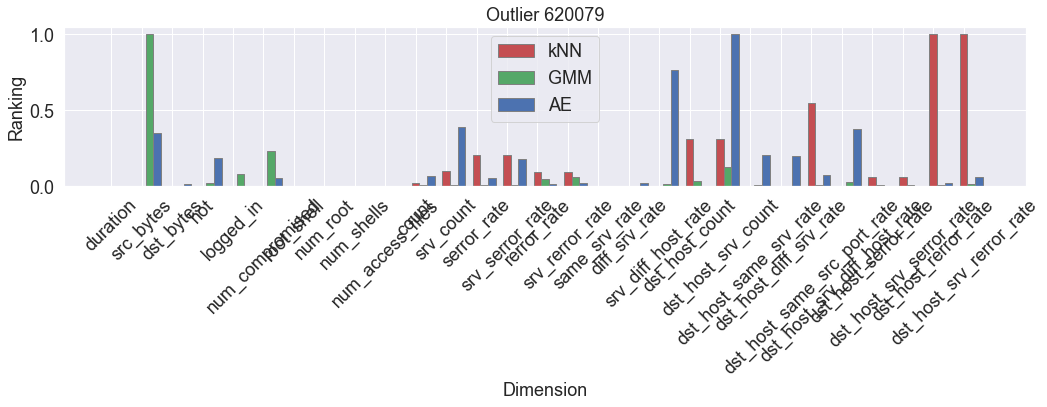

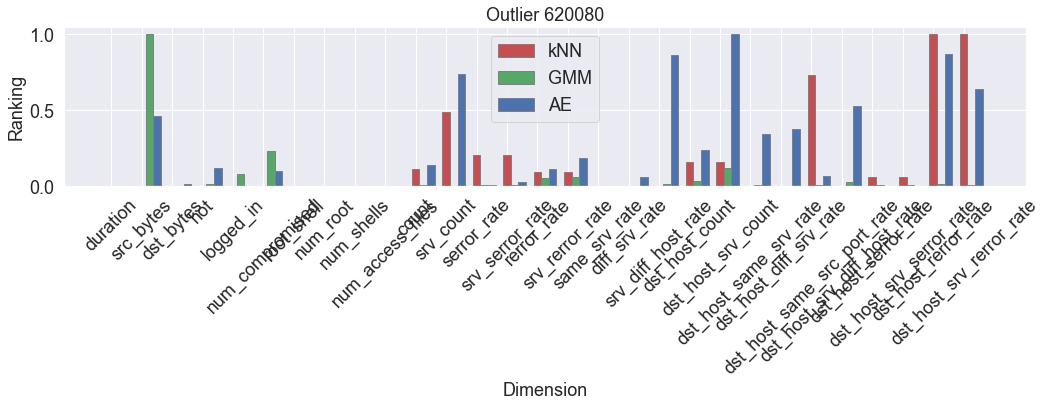

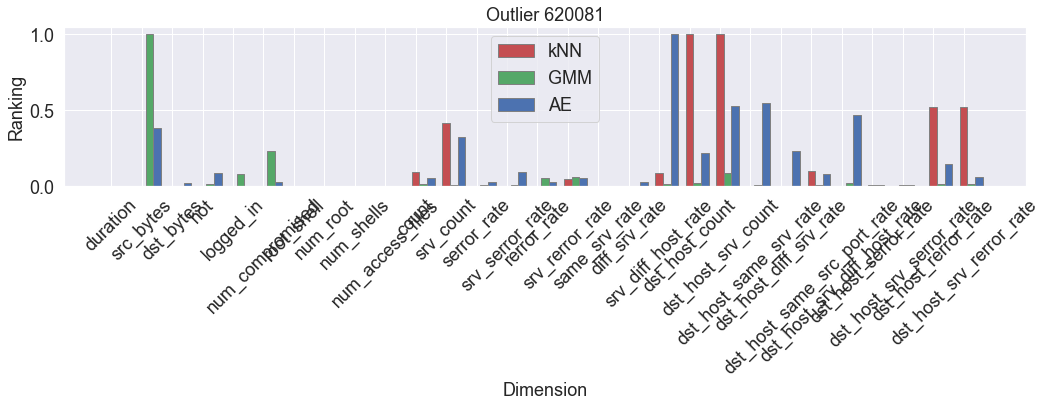

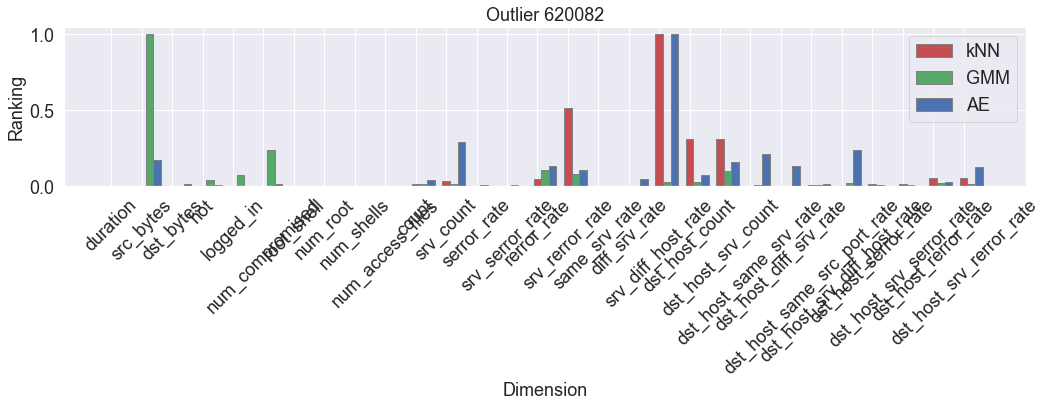

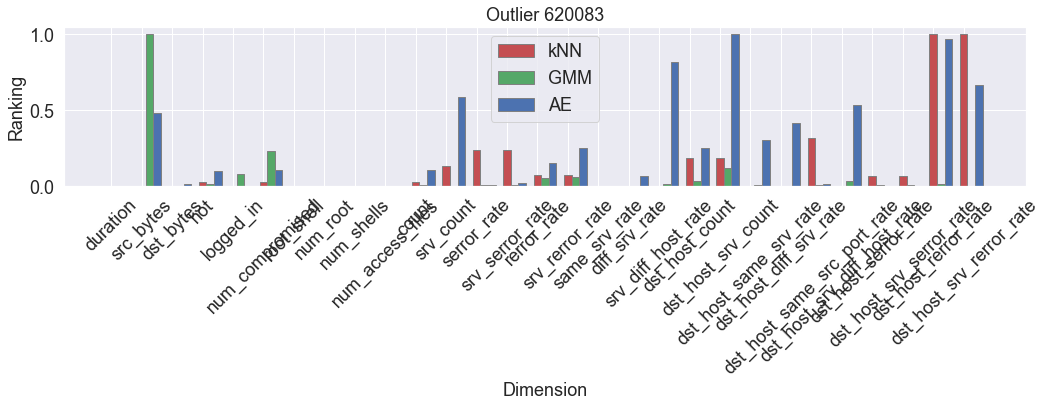

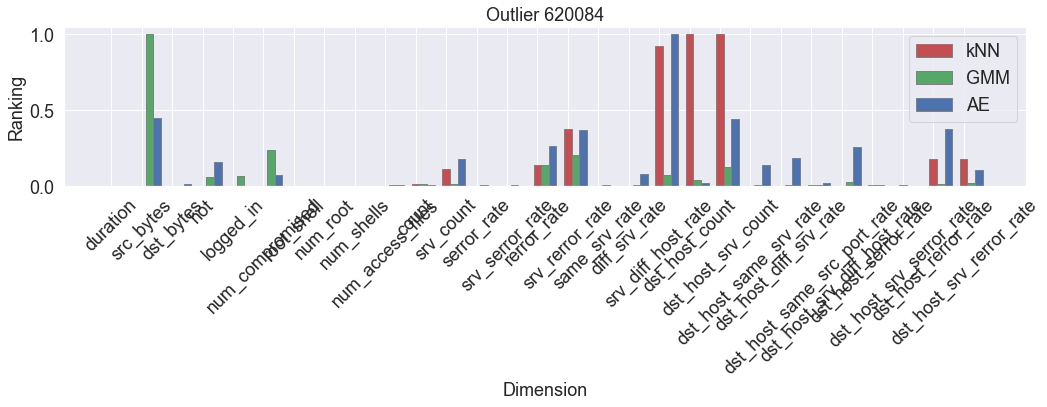

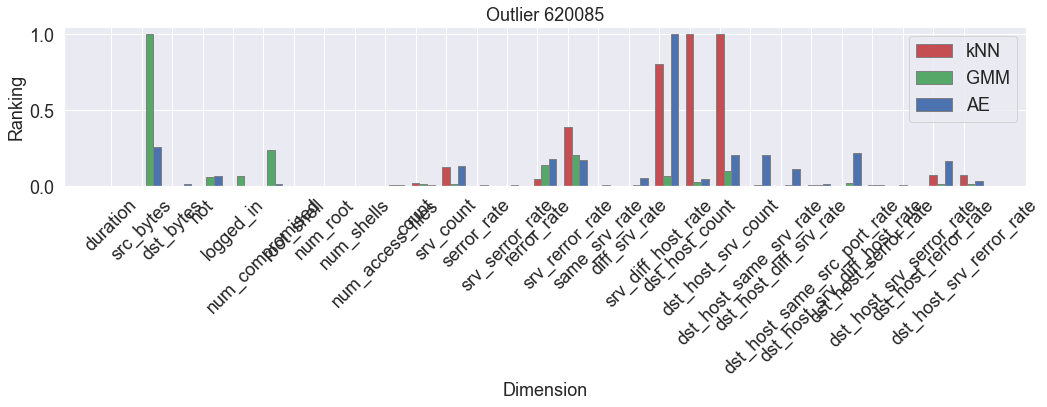

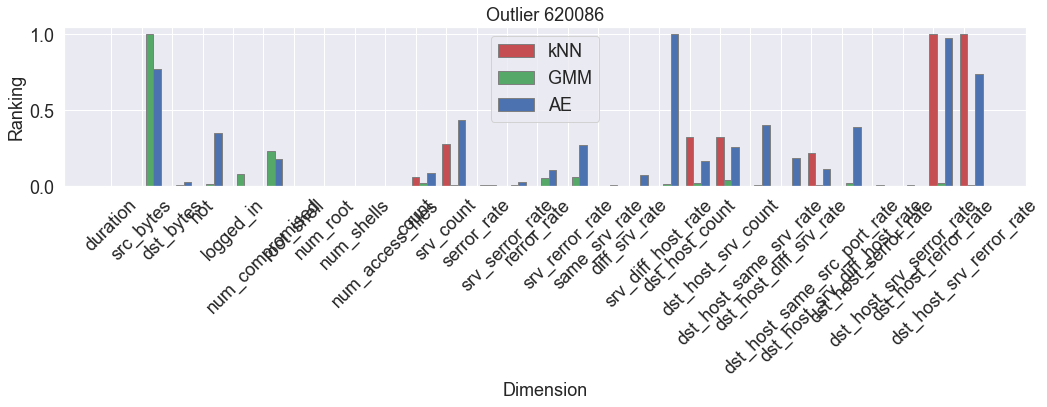

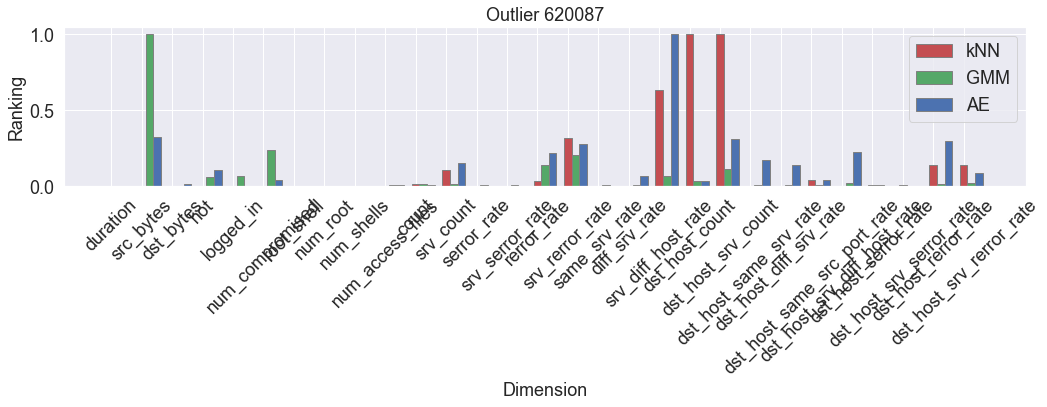

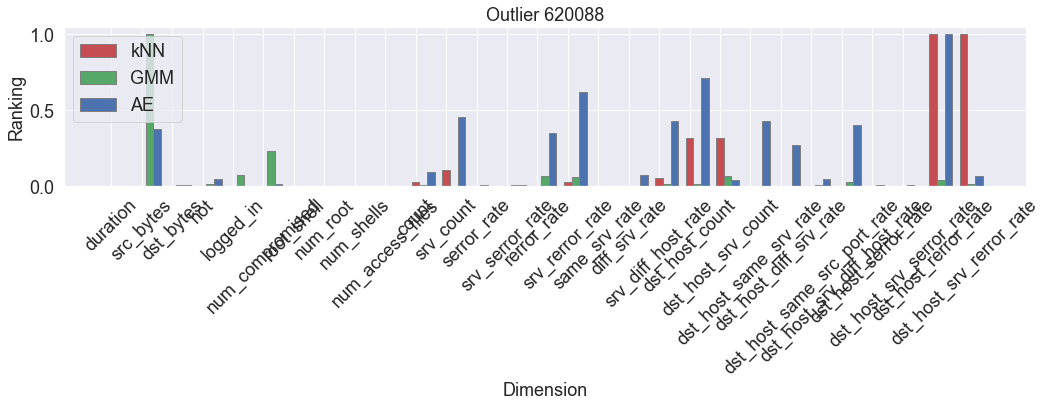

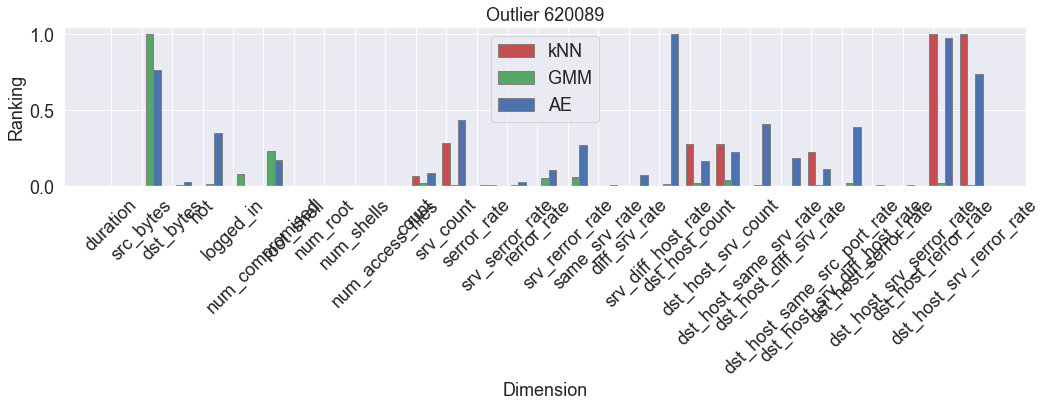

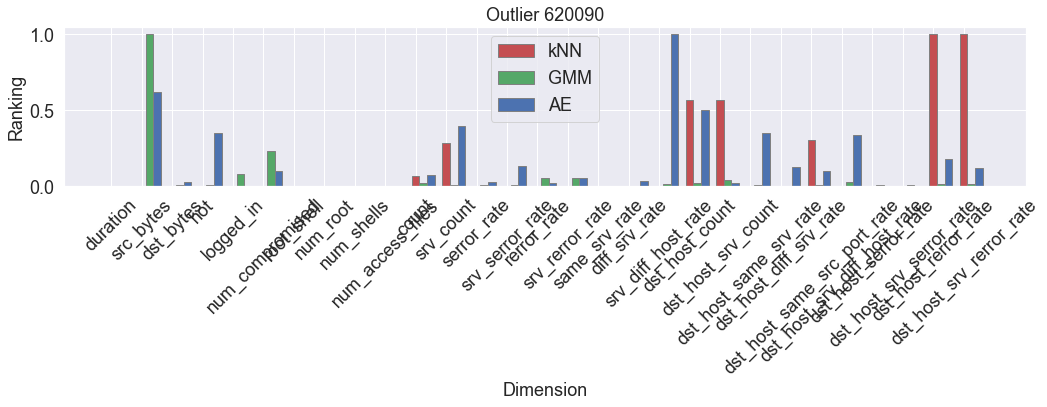

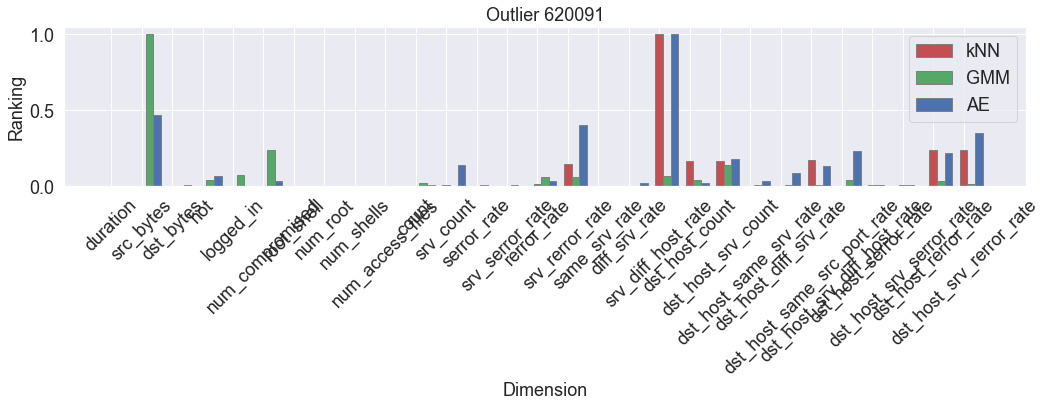

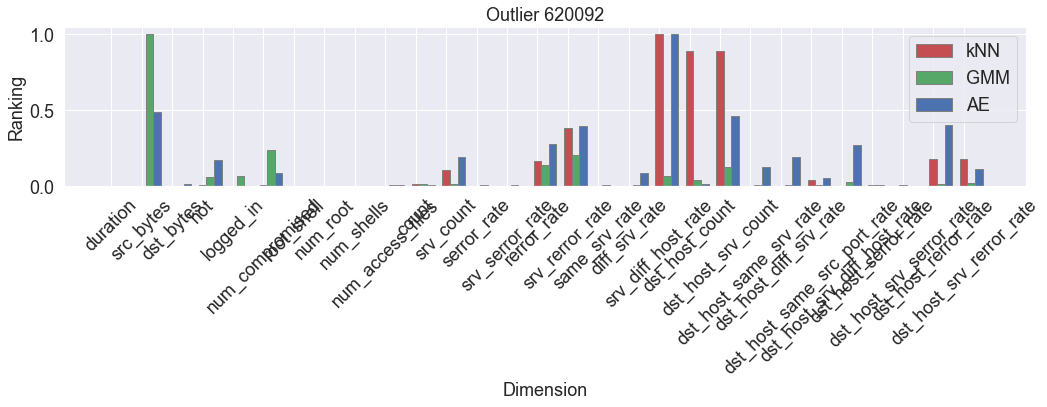

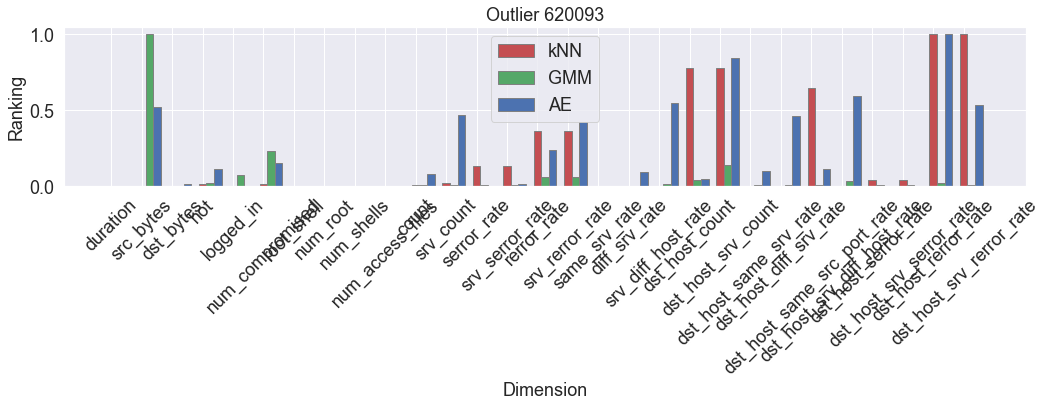

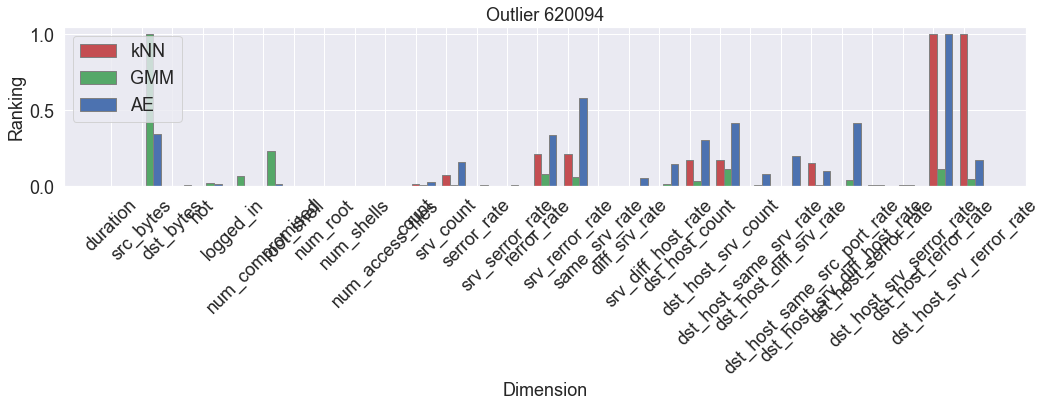

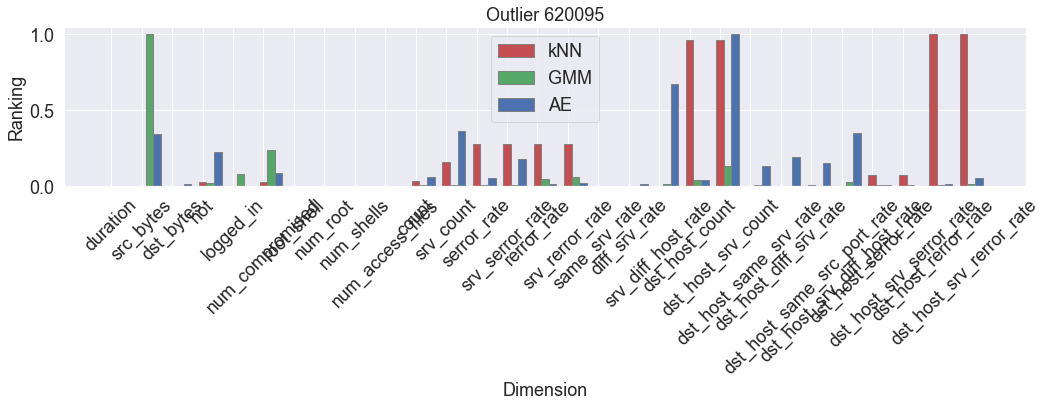

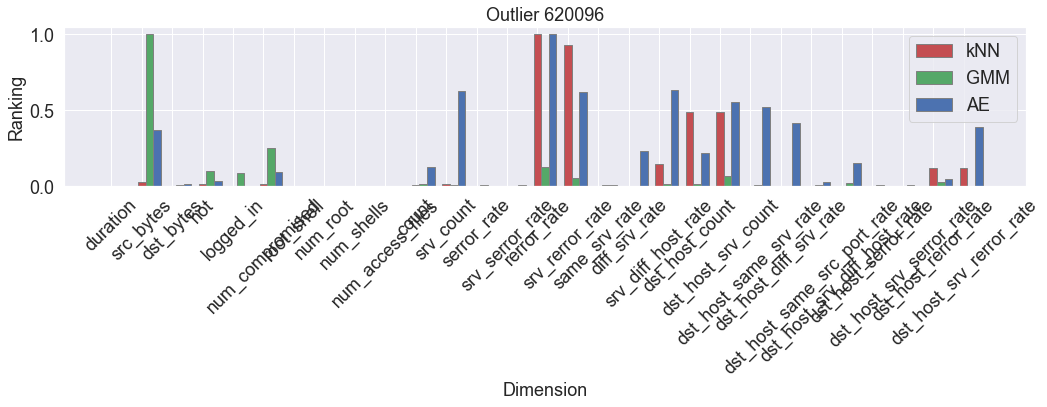

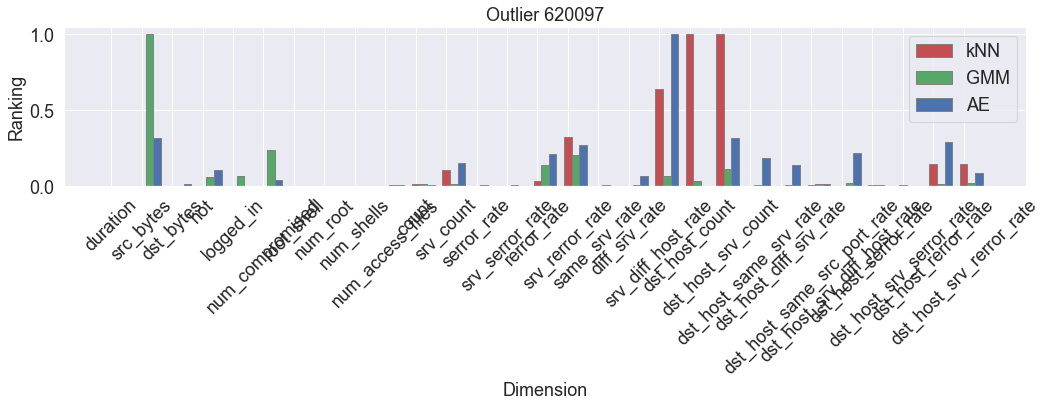

In [16]:
# plot feature ranking for individual outliers
for i in knn_distances.index.values[-20:]:
    barWidth = 0.25
    fig, ax = plt.subplots(1, 1, figsize=(15,6))

    outlier_idx = i

    # set height of bar
    knn = knn_distances.loc[outlier_idx].values
    knn = knn / np.max(knn)
    gm = gm_distances.loc[outlier_idx].values
    gm = gm / np.max(gm)
    ae = ae_distances.loc[outlier_idx].values
    ae = ae / np.max(ae)

    # Set position of bar on X axis
    br1 = np.arange(len(knn))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    ax.bar(br1, knn, color ='r', width = barWidth,
            edgecolor ='grey', label ='kNN')
    ax.bar(br2, gm, color ='g', width = barWidth,
            edgecolor ='grey', label ='GMM')
    ax.bar(br3, ae, color ='b', width = barWidth,
            edgecolor ='grey', label ='AE')

    # Adding Xticks
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Ranking')
    #ax.set_ylim([0, 1.03])
    ax.set_xticks([r for r in range(len(knn))])
    ax.legend()
    ax.set_title("Outlier " + str(outlier_idx))
    ax.set_xticklabels(knn_distances.columns, rotation=45)

    fig.tight_layout()
    #plt.savefig(f"images/synthetic_data_ranking_outlier_{outlier_idx}.eps", bbox_inches="tight")
    plt.show()

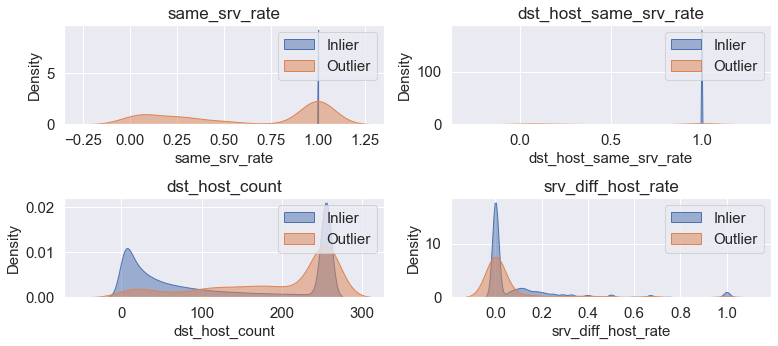

In [6]:
# plot the density estimation of the top ranked features for the inlier and outlier class
columns = knn_distances.columns[sort_indx][:4]
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
#plt.savefig("images/wine_quality_top_feature_density.svg", bbox_inches="tight")
plt.show()

C:\Users\LKRENMA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\LKRENMA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


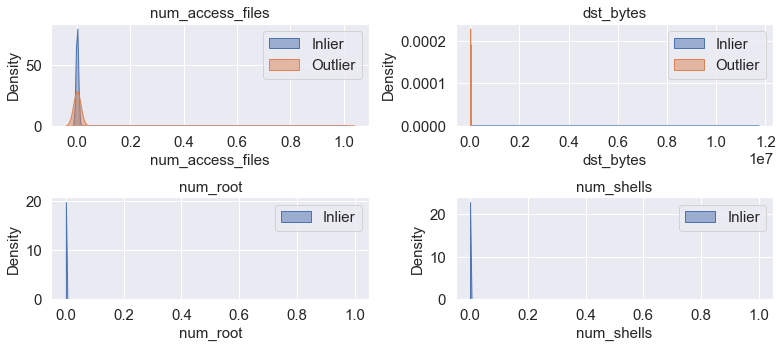

In [26]:
# plot the density estimation of the top ranked features for the inlier and outlier class
columns = knn_distances.columns[sort_indx][-4:]
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
#plt.savefig("images/wine_quality_top_feature_density.svg", bbox_inches="tight")
plt.show()

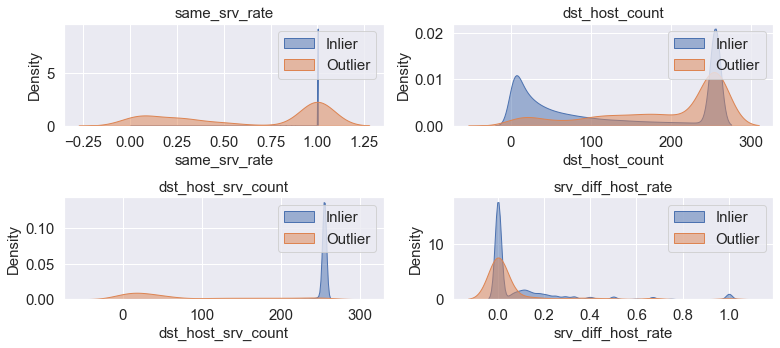

In [66]:
columns = knn_distances.columns[sort_indx_knn][:4]
# plot the density estimation of the top ranked features for the inlier and outlier class
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
plt.show()

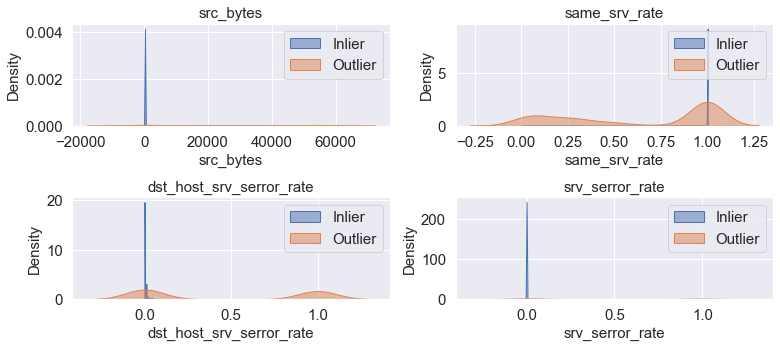

In [68]:
columns = gm_distances.columns[sort_indx_gm][:4]
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
plt.show()

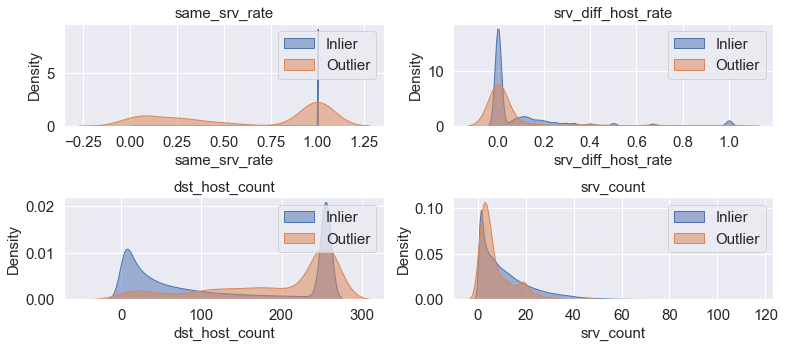

In [70]:
columns = ae_distances.columns[sort_indx_ae][:4]
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
plt.show()

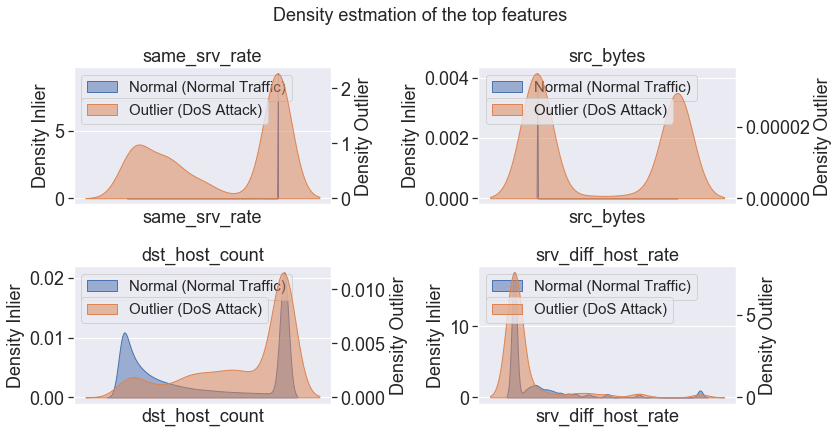

In [22]:
columns = ["same_srv_rate", "src_bytes", "dst_host_count", "srv_diff_host_rate"]

fig, axes = plt.subplots(2, 2, figsize=(12, 5.8))

for ax, c in zip(axes.flatten(), columns):
    ax2 = ax.twinx()
    sns.kdeplot(data=df[df["label"] == "o"], x=c, ax=ax2, alpha=.5, fill=True, label="Outlier (DoS Attack)", bw_adjust=.9, color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804))
    sns.kdeplot(data=df[df["label"] == "n"], x=c, ax=ax, alpha=.5, fill=True, label="Normal (Normal Traffic)",  bw_adjust=.9, color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
    ax.legend(loc="upper left")
    ax.set_ylabel("Density Inlier")
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.83))
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_ylabel("Density Outlier")
    ax.set_title(c)
fig.suptitle("Density estmation of the top features", y=1.05)
fig.tight_layout()
plt.savefig("images/kdd_cup_data_density_estimation_v2.svg", bbox_inches="tight")
plt.show()